# Preparations

I have installed kaggle-cli and downloaded the data using 

`kg download -c dogs-vs-cats-redux-kernels-edition`

We then need to run the datapreparation script in the data subdirectory:

In [ ]:
!cd data
!python datapreparation.py
!cd ..
!tree -d data/

This produces a useful data subdirectory, and we can continue with CNNs 

# Cats dogs redux

We have replicated the data structure and are now ready to roll.

In [1]:
%matplotlib inline

In [2]:
path = "data/sample/"

In [3]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth = 100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


It just happened that this call produced an error about a non-accessible GPU. It turned out that 

` nvidia-smi`

threw an error too. This had likely something to do with me accidentally updating my aws instance. Stopping and starting resolved the problem.

In [5]:
batch_size = 32
from vgg16 import Vgg16
vgg = Vgg16()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [6]:
batches = vgg.get_batches(path + 'train', batch_size =4)

Found 50 images belonging to 2 classes.


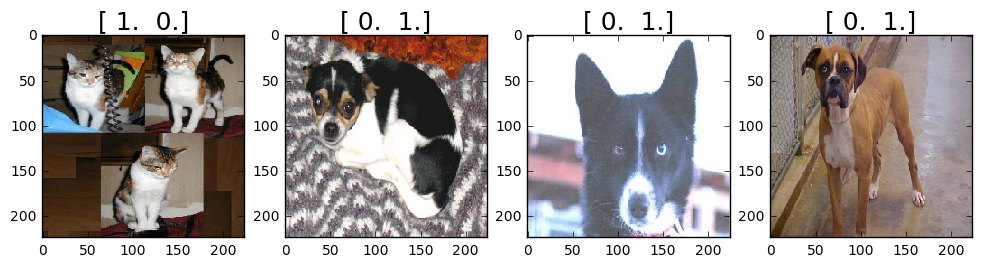

In [7]:
imgs, labels = next(batches)
plots(imgs, titles = labels)

In [8]:
vgg.predict(imgs, True)

(array([ 0.4523,  0.7172,  0.3863,  0.962 ], dtype=float32),
 array([281, 158, 227, 242]),
 [u'tabby', u'toy_terrier', u'kelpie', u'boxer'])

This looks quite promising, really. We now should really re-train for cats and dogs. off we go!

Great. We can now proceed with finetuning this model. Maybe even on a t2.large instance. Let's see if that works.
# Finetuning

In [9]:
batch_size = 32
batches = vgg.get_batches(path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size=batch_size)


Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [10]:
vgg.finetune(batches)

In [11]:
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1
50/50 [==============================] - 3s - loss: 3.7881 - acc: 0.3400 - val_loss: 0.8204 - val_acc: 0.7400


Aha! This looks good. We now train on the full training data, for one epoch:

In [12]:
path = "data/"
batch_size = 32
batches = vgg.get_batches(path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size=batch_size)


Found 20000 images belonging to 2 classes.
Found 4900 images belonging to 2 classes.


In [14]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1
20000/20000 [==============================] - 640s - loss: 0.2420 - acc: 0.9543 - val_loss: 0.1680 - val_acc: 0.9743


In [16]:
vgg.model.save_weights(path+'/results/2017-01-25.h5')

In [17]:
vgg.predict(imgs, True)

(array([ 1.    ,  0.7732,  1.    ,  1.    ], dtype=float32),
 array([0, 1, 1, 1]),
 [u'tench', u'goldfish', u'goldfish', u'goldfish'])

In [18]:
vgg.predict(imgs, False)

(array([ 1.    ,  0.7732,  1.    ,  1.    ], dtype=float32),
 array([0, 1, 1, 1]),
 [u'tench', u'goldfish', u'goldfish', u'goldfish'])